In [4]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

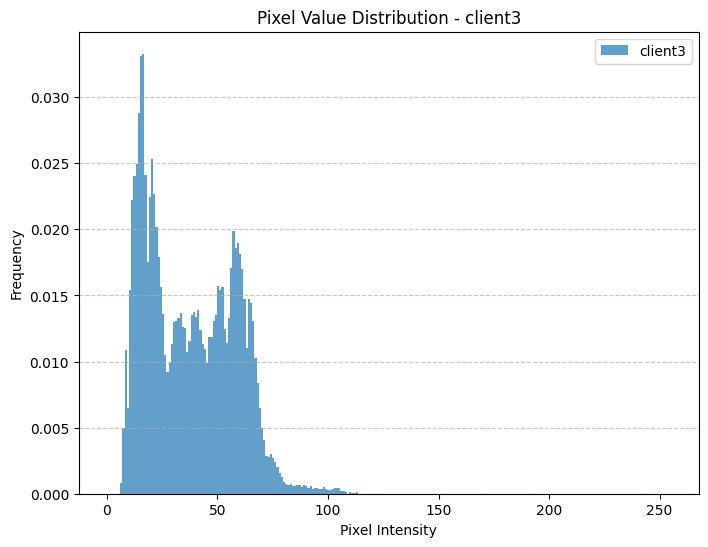

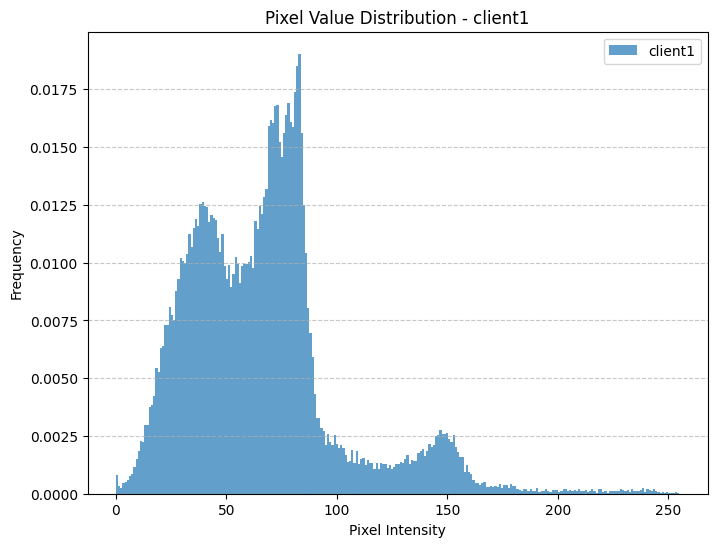

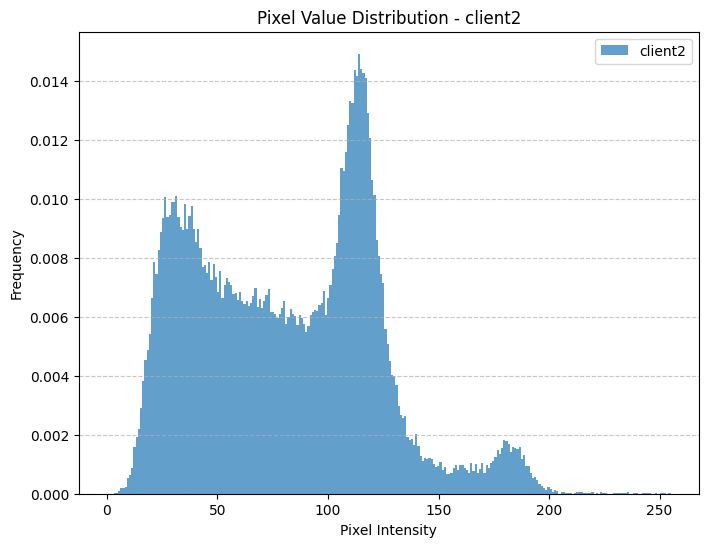

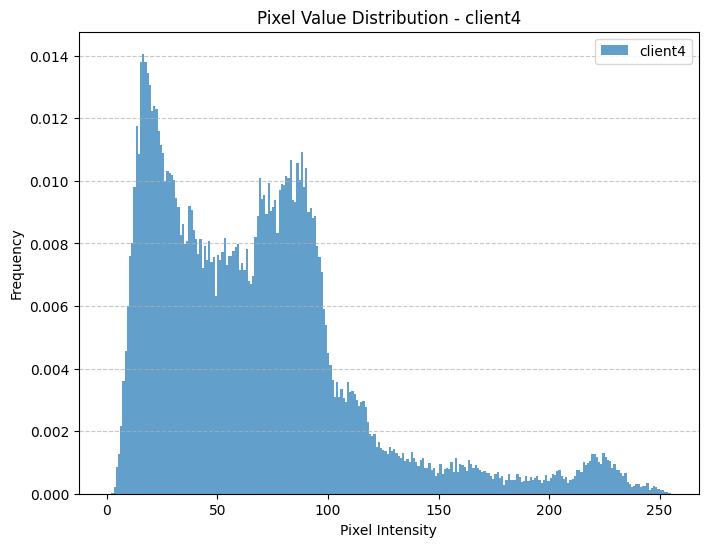

In [ ]:
image_folder_paths = {'client3':"/media/morikawa/DataHDD/home/data/segmentation/spinal/semi/client_3/data/sc01/img_vis/sc01_17.png",
                      'client1':"/media/morikawa/DataHDD/home/data/segmentation/spinal/semi/client_1/data/sc01/img_vis/sc01_2.png",
                      'client2':"/media/morikawa/DataHDD/home/data/segmentation/spinal/semi/client_2/data/sc01/img_vis/sc01_5.png",
                      'client4':"/media/morikawa/DataHDD/home/data/segmentation/spinal/semi/client_4/data/sc01/img_vis/sc01_10.png",}


pixel_values = {}
for client, file_name in image_folder_paths.items():
    image_path = Path(file_name)
    image = Image.open(image_path).convert("L")
    pixel_values[client] =np.array(image).flatten()

for client, values in pixel_values.items():
    plt.figure(figsize=(8, 6))
    plt.hist(values, bins=256, range=(0, 255), density=True, alpha=0.7, label=f"{client}")
    plt.title(f"Pixel Value Distribution - {client}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

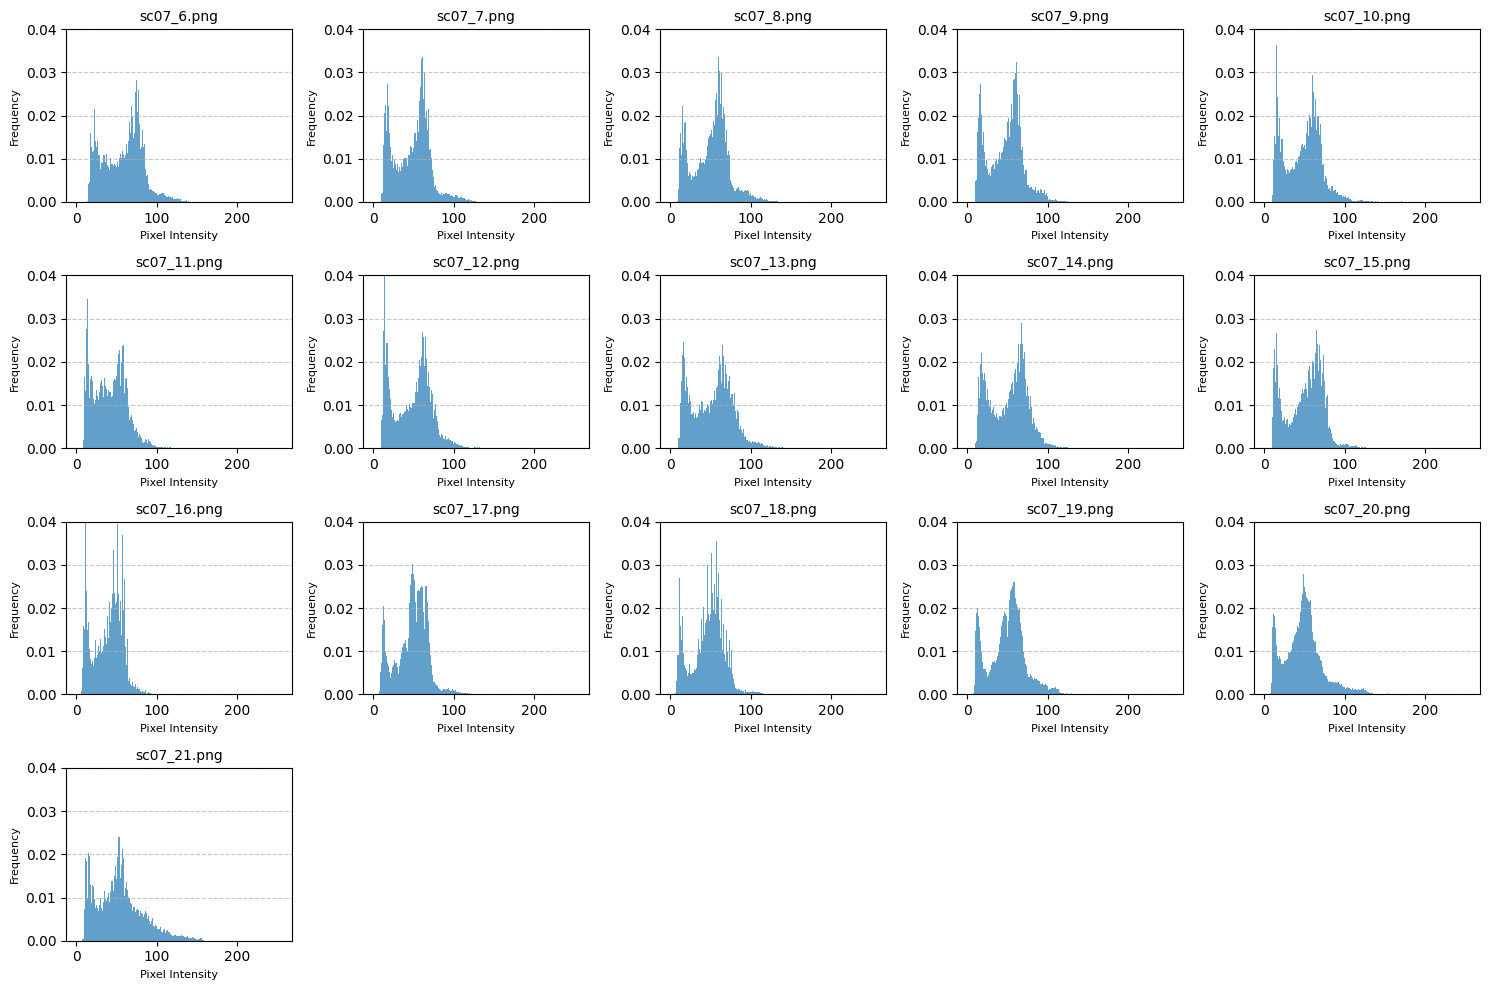

In [22]:

folder_path = Path("/media/morikawa/DataHDD/home/data/segmentation/spinal/semi/client_3/data/sc07/img_vis")
folder_len = len(os.listdir(folder_path))
image_folder_paths = [os.path.join(folder_path,f"sc07_{i}.png") for i in range(6,6+folder_len)]

pixel_values = {}
for file_name in image_folder_paths:
    basename = file_name.split('/')[-1]
    image_path = Path(file_name)
    image = Image.open(image_path).convert("L")
    pixel_values[basename] =np.array(image).flatten()

cols = 5
rows = 4

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten() 

for i, (client, values) in enumerate(pixel_values.items()):
    ax = axes[i]
    ax.hist(values, bins=256, range=(0, 255), density=True, alpha=0.7)
    ax.set_title(f"{client}", fontsize=10)
    ax.set_xlabel("Pixel Intensity", fontsize=8)
    ax.set_ylabel("Frequency", fontsize=8)
    ax.set_ylim((0, 0.04)) 
    ax.grid(axis='y', linestyle='--', alpha=0.7)

for j in range(len(pixel_values), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()